In [2]:
#Install needed packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install missingno

#import full packages or separate tools needed from packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import scipy.stats as stats

In [4]:
#Import data from hard drive
med = pd.read_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D206\medical_raw_data.csv")

In [134]:
#Display the number of records and columns in data set
print (med.shape)

(10000, 53)


In [135]:
# View column names & data types
print (med.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [136]:
#Examine total nulls in each column
med.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [137]:
#histograms will be generated for columns with nulls to assess how to treat.
#'Soft_drink' column created an error because the values are not numerical.
#The .unique command shows variables in the column.
med['Soft_drink'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [138]:
#Replace yes/no variables with 1/0 similar to True/False boolean.
med.Soft_drink.replace(('Yes','No'),(1,0),inplace=True)

In [139]:
#Check that values were changed
med['Soft_drink'].unique()

array([nan,  0.,  1.])

In [140]:
#Due to the error with 'Soft_drink', the analyst decided to re-express categorical values first.

#Convert the remaining yes/no columns to avoid similar issues for other columns.
med.ReAdmis.replace(('Yes','No'),(1,0),inplace=True)
med.HighBlood.replace(('Yes','No'),(1,0),inplace=True)
med.Stroke.replace(('Yes','No'),(1,0),inplace=True)
med.Arthritis.replace(('Yes','No'),(1,0),inplace=True)
med.Diabetes.replace(('Yes','No'),(1,0),inplace=True)
med.Hyperlipidemia.replace(('Yes','No'),(1,0),inplace=True)
med.BackPain.replace(('Yes','No'),(1,0),inplace=True)
med.Allergic_rhinitis.replace(('Yes','No'),(1,0),inplace=True)
med.Reflux_esophagitis.replace(('Yes','No'),(1,0),inplace=True)
med.Asthma.replace(('Yes','No'),(1,0),inplace=True)

In [141]:
#Rename survey answer columns to better represent data.
med.rename(columns ={'Item1':'S1_Timely_admission', 'Item2':'S2_Timely_Treatment', 'Item3':'S3_Timely_Visits', 'Item4':'S4_Reliability', 'Item5':'S5_Options', 'Item6':'S6_Hours_of_Treatment', 'Item7':'S7_Courteous_staff', 'Item8':'S8_Dr_Actively_Listened'}, inplace=True)

In [142]:
#Display each unique value in 'Education' column
med.Education.unique()

array(['Some College, Less than 1 Year',
       'Some College, 1 or More Years, No Degree',
       'GED or Alternative Credential', 'Regular High School Diploma',
       "Bachelor's Degree", "Master's Degree",
       'Nursery School to 8th Grade',
       '9th Grade to 12th Grade, No Diploma', 'Doctorate Degree',
       "Associate's Degree", 'Professional School Degree',
       'No Schooling Completed'], dtype=object)

In [143]:
#Create a new education_numeric column to convert 'Education' to ranked numeric.
med['education_numeric']= med['Education']
dict_edu = {'education_numeric':{'No Schooling Completed':0, 'Nursery School to 8th Grade':8, '9th Grade to 12th Grade, No Diploma':10, 'GED or Alternative Credential':12, 'Regular High School Diploma':12, 'Some College, Less than 1 Year':13, 'Some College, 1 or More Years, No Degree':13, "Associate's Degree" : 14, "Bachelor's Degree": 16, "Master's Degree": 20, 'Professional School Degree':20, 'Doctorate Degree':22, "unknown":np.NaN}}
med.replace(dict_edu, inplace=True)

In [144]:
#Verify that all values were converted to numbers.
med.education_numeric.unique()

array([13, 12, 16, 20,  8, 10, 22, 14,  0], dtype=int64)

In [145]:
#Display each unique value in 'Complication_risk' column.
med.Complication_risk.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [146]:
#Replace ordinal values with numbers
med.Complication_risk.replace(('Low','Medium', 'High'),(0,1,2),inplace=True)

In [147]:
#Verify that all values are now numeric.
med.Complication_risk.unique()

array([1, 2, 0], dtype=int64)

In [148]:
#Display Unique Values of 'Area' column.
med.Area.unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [149]:
#Rank 'Area' in respect to higher population.
med.Area.replace(('Rural','Suburban', 'Urban'),(0,1,2),inplace=True)

In [150]:
#Replace 'Timezone' values with numbers according to the relation to GMT. 
med['timezone_numeric'] = med['Timezone']
dict_time = {'timezone_numeric':{'America/Chicago': -6, 'America/New_York': -5, 'America/Los_Angeles':-8,
       'America/Indiana/Indianapolis': -5, 'America/Detroit': -5,
       'America/Denver': -7 , 'America/Nome': -9, 'America/Anchorage': -9,
       'America/Phoenix': -7, 'America/Boise': -7, 'America/Puerto_Rico': -4,
       'America/Yakutat': -9, 'Pacific/Honolulu': -10, 'America/Menominee': -6,
       'America/Kentucky/Louisville': -5, 'America/Indiana/Vincennes': -5,
       'America/Toronto': -5, 'America/Indiana/Marengo': -5,
       'America/Indiana/Winamac': -5, 'America/Indiana/Tell_City': -6,
       'America/Sitka': -9, 'America/Indiana/Knox': -6,
       'America/North_Dakota/New_Salem': -6, 'America/Indiana/Vevay': -5,
       'America/Adak': -10, 'America/North_Dakota/Beulah': -6}}
med.replace(dict_time, inplace=True)

In [151]:
#Verify 'Timezone' is numeric.
med.timezone_numeric.unique()

array([ -6,  -5,  -8,  -7,  -9,  -4, -10], dtype=int64)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

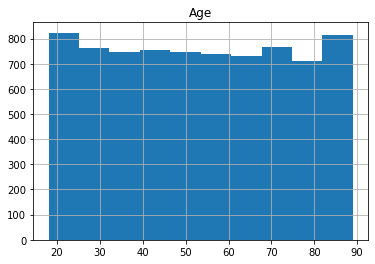

In [152]:
#Create histograms for missing value fields. 
med.hist(['Age'])

array([[<AxesSubplot:title={'center':'Children'}>]], dtype=object)

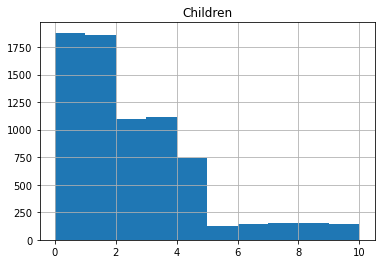

In [153]:
med.hist(['Children'])

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

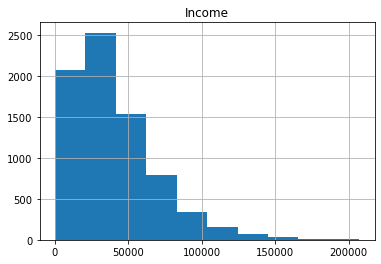

In [154]:
med.hist(['Income'])

array([[<AxesSubplot:title={'center':'Overweight'}>]], dtype=object)

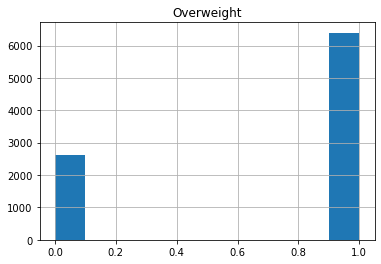

In [155]:
med.hist(['Overweight'])

array([[<AxesSubplot:title={'center':'Anxiety'}>]], dtype=object)

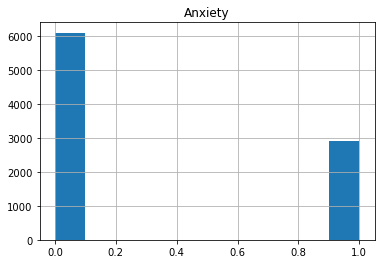

In [156]:
med.hist(['Anxiety'])

array([[<AxesSubplot:title={'center':'Initial_days'}>]], dtype=object)

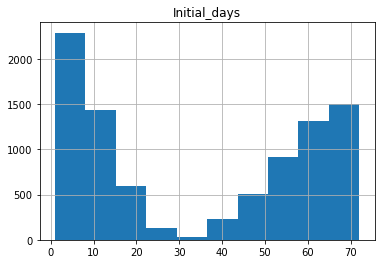

In [157]:
med.hist(['Initial_days'])

array([[<AxesSubplot:title={'center':'Soft_drink'}>]], dtype=object)

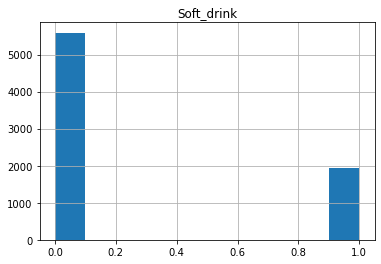

In [158]:
med.hist(['Soft_drink'])

<AxesSubplot:>

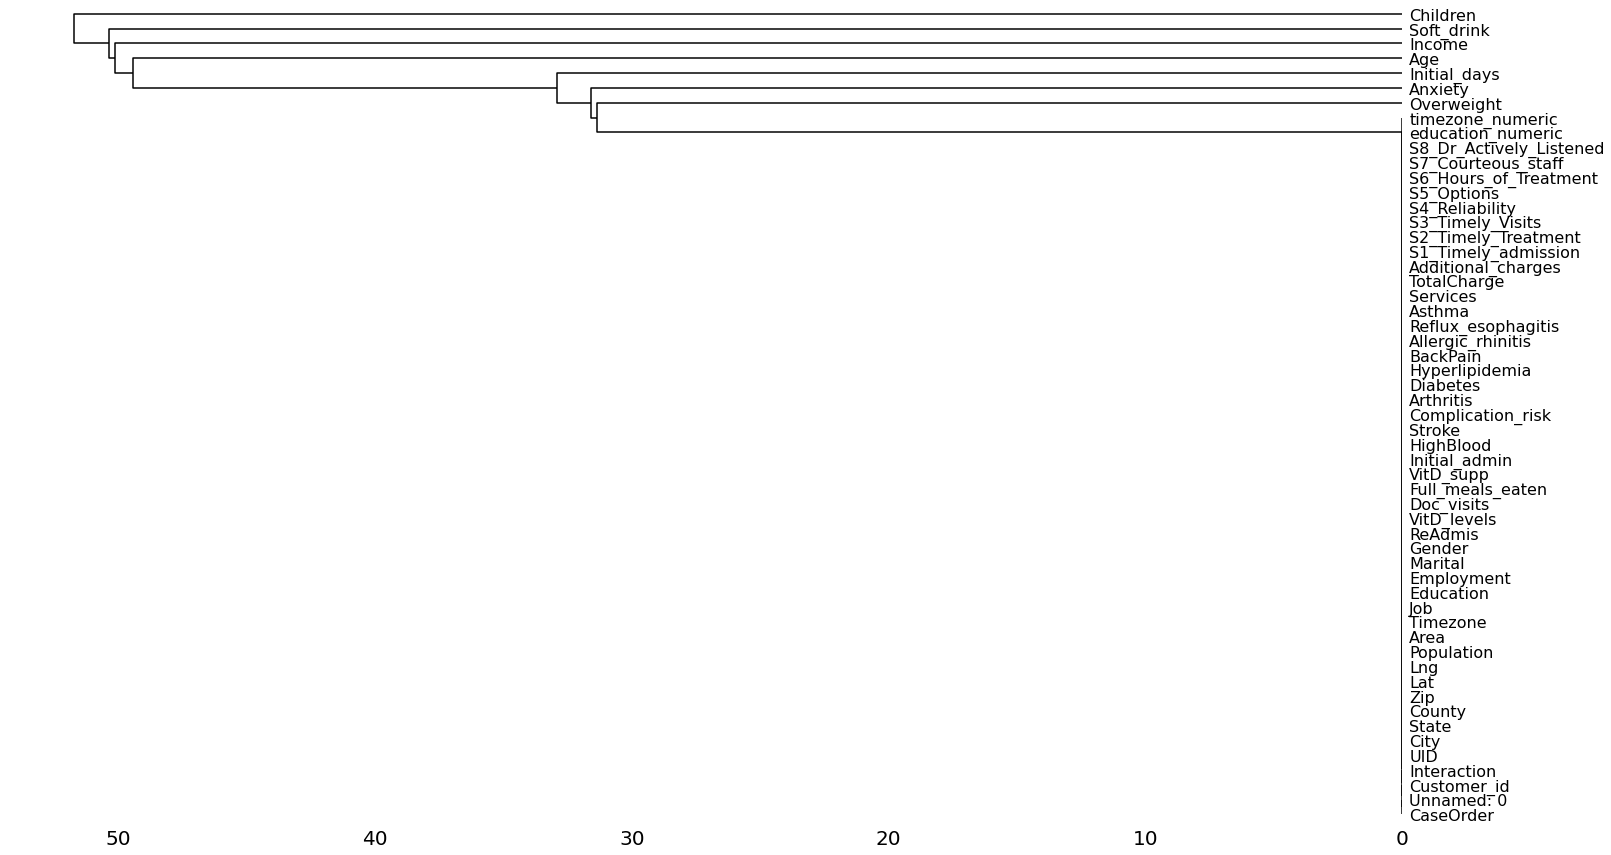

In [159]:
#Create a dendrogram to see if there is any correlation in missing data that might change how missing values are treated.
msno.dendrogram(med)

In [160]:
#View what columns are still Dtype "object" to see if any ordinal value columns remain to be re-expressed. 
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   CaseOrder                10000 non-null  int64  
 2   Customer_id              10000 non-null  object 
 3   Interaction              10000 non-null  object 
 4   UID                      10000 non-null  object 
 5   City                     10000 non-null  object 
 6   State                    10000 non-null  object 
 7   County                   10000 non-null  object 
 8   Zip                      10000 non-null  int64  
 9   Lat                      10000 non-null  float64
 10  Lng                      10000 non-null  float64
 11  Population               10000 non-null  int64  
 12  Area                     10000 non-null  int64  
 13  Timezone                 10000 non-null  object 
 14  Job                    

In [161]:
#Fill null values of balances data with mean average
med['Age'].fillna(med['Age'].median(), inplace=True)

In [162]:
#Fill null values of skewed or bi-modal data with median.
med['Children'].fillna(med['Children'].median(), inplace=True)

In [163]:
med['Income'].fillna(med['Income'].median(), inplace=True)

In [164]:
med['Overweight'].fillna(med['Overweight'].median(), inplace=True)

In [165]:
med['Anxiety'].fillna(med['Anxiety'].median(), inplace=True)

In [166]:
med['Initial_days'].fillna(med['Initial_days'].median(), inplace=True)

In [167]:
med['Soft_drink'].fillna(med['Soft_drink'].median(), inplace=True)

In [168]:
#Check that null values are full
med.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
ReAdmis                    0
VitD_levels                0
Doc_visits                 0
Full_meals_eaten           0
VitD_supp                  0
Soft_drink                 0
Initial_admin              0
HighBlood                  0
Stroke                     0
Complication_risk          0
Overweight                 0
Arthritis                  0
Diabetes      

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

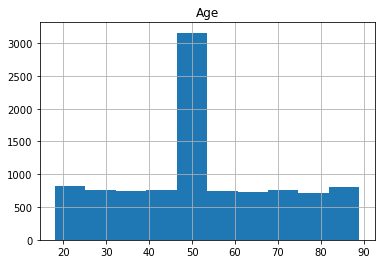

In [169]:
#Histograms of columns that have had missing values imputed.
#This will display if the distribution of data has greatly varied from the original data set.
med.hist(['Age'])

array([[<AxesSubplot:title={'center':'Children'}>]], dtype=object)

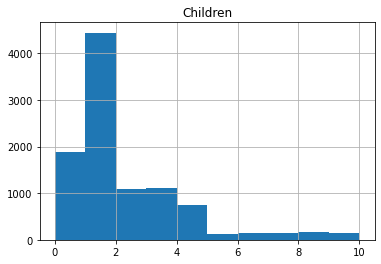

In [170]:
med.hist(['Children'])

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

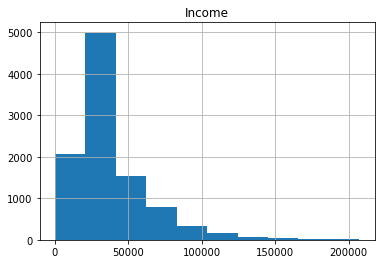

In [171]:
med.hist(['Income'])

array([[<AxesSubplot:title={'center':'Overweight'}>]], dtype=object)

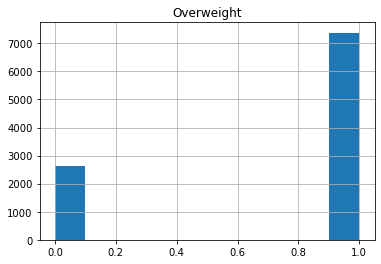

In [172]:
med.hist(['Overweight'])

array([[<AxesSubplot:title={'center':'Anxiety'}>]], dtype=object)

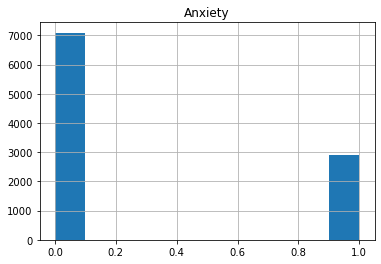

In [173]:
med.hist(['Anxiety'])

array([[<AxesSubplot:title={'center':'Initial_days'}>]], dtype=object)

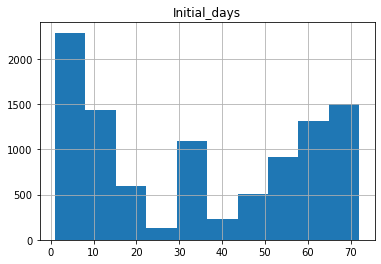

In [174]:
med.hist(['Initial_days'])

array([[<AxesSubplot:title={'center':'Soft_drink'}>]], dtype=object)

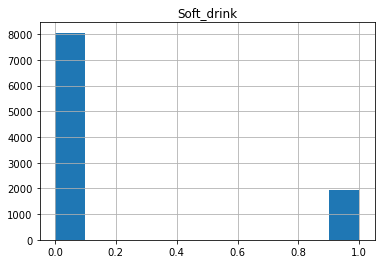

In [175]:
med.hist(['Soft_drink'])

In [177]:
#Create Z-scores for numerical columns to detect outliers.
med['children_z'] = stats.zscore(med['Children'])

In [178]:
#Separate Z-scores >3 & <-3 to separate outliers from the rest of the data set.
children_outliers = med.query('children_z > 3 | children_z < -3')

(array([157.,   0.,   0.,   0.,   0.,  83.,   0.,   0.,   0.,  63.]),
 array([ 8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <BarContainer object of 10 artists>)

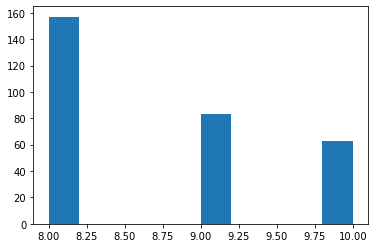

In [179]:
#Display outliers in a histogram
#Out of 10,000 patients, it is possible that this number of patients had 8,9, or 10 children. Outliers will be retained.
pp.hist(children_outliers['Children'])

In [180]:
#Zip Z-score
med['zip_z'] = stats.zscore(med['Zip'])

In [181]:
zip_outliers = med.query('zip_z > 3 | zip_z < -3')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

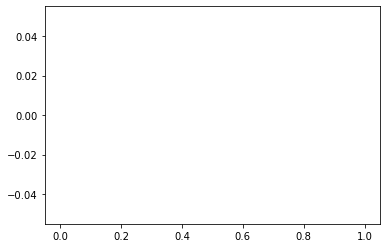

In [182]:
#No outliers detected. No action taken.
pp.hist(zip_outliers['Zip'])

In [183]:
#Population Z-score
med['pop_z'] = stats.zscore(med['Population'])

In [184]:
pop_outliers = med.query('pop_z > 3 | pop_z < -3')

(array([91., 56., 21., 16., 15.,  7.,  6.,  4.,  0.,  2.]),
 array([ 54453. ,  61289.1,  68125.2,  74961.3,  81797.4,  88633.5,
         95469.6, 102305.7, 109141.8, 115977.9, 122814. ]),
 <BarContainer object of 10 artists>)

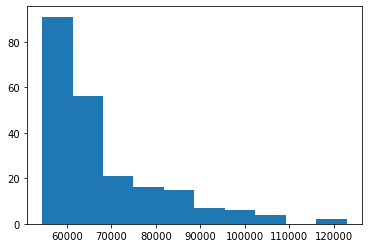

In [185]:
#These values are realistic populations. These outliers will be retained and adjusted if needed later on in the analysis cycle.
pp.hist(pop_outliers['Population'])

In [186]:
#Age Z-scores
med['age_z'] = stats.zscore(med['Age'])

In [187]:
age_outliers = med.query('age_z > 3 | age_z < -3')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

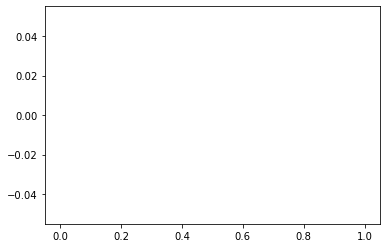

In [188]:
# No outliers detected
pp.hist(age_outliers['Age'])

In [189]:
#Income Z-scores
med['income_z'] = stats.zscore(med['Income'])

In [190]:
#Detect outliers
income_outliers = med.query('income_z > 3 | income_z < -3')

(array([54., 38., 25., 23., 11., 11.,  6.,  2.,  7.,  3.]),
 array([114215.99 , 123519.304, 132822.618, 142125.932, 151429.246,
        160732.56 , 170035.874, 179339.188, 188642.502, 197945.816,
        207249.13 ]),
 <BarContainer object of 10 artists>)

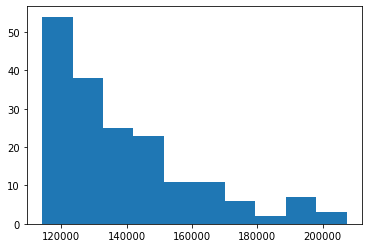

In [191]:
#These incomes are possible for the size of the data set. These outliers will be retained.
pp.hist(income_outliers['Income'])

In [192]:
#VitD_levels Z-scores.
med['VitD_levels_z'] = stats.zscore(med['VitD_levels'])

In [193]:
vitd_lev_outliers = med.query('VitD_levels_z > 3 | VitD_levels_z < -3')

(array([  6.,  16.,  38.,  90.,  89., 104.,  88.,  42.,  19.,   8.]),
 array([40.8416712 , 42.0594165 , 43.27716179, 44.49490709, 45.71265238,
        46.93039768, 48.14814298, 49.36588827, 50.58363357, 51.80137886,
        53.01912416]),
 <BarContainer object of 10 artists>)

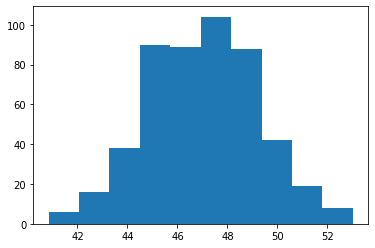

In [194]:
# A quick Google search revealed vitamin D levels between 25-40 are normal.
#The highest recorded vitamin D level is over 200, so these levels and the number of values seem possible.
#Outliers will be retained.
pp.hist(vitd_lev_outliers['VitD_levels'])

In [195]:
#Doc_visits Z-scores.
med['doc_vis_z'] = stats.zscore(med['Doc_visits'])

In [196]:
doc_vis_outliers = med.query('doc_vis_z > 3 | doc_vis_z < -3')

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

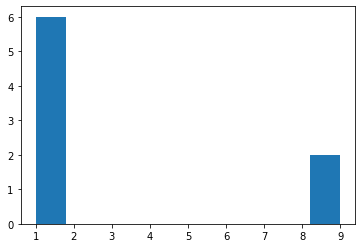

In [197]:
#6 patients had only one doctor visit and 2 had 9 visits. Out of 10,000 patients, this seems completely possible
#Outliers will be retained.
pp.hist(doc_vis_outliers['Doc_visits'])

In [198]:
#Full_meals_eaten Z-scores.
med['meals_z'] = stats.zscore(med['Full_meals_eaten'])

In [199]:
meals_outliers = med.query('meals_z > 3 | meals_z < -3')

(array([25.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  2.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

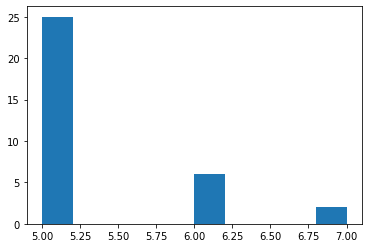

In [200]:
#The histogram is not clear on the values given.
pp.hist(meals_outliers['Full_meals_eaten'])

In [201]:
#Unique values of Full_meals_eaten
#The column represents meals for the entire stay. the dictionary says patients are allowed to request more than 3 meals per day.
#Outliers will be retained.
print(meals_outliers['Full_meals_eaten'].unique())

[5 7 6]


In [202]:
#VitD_supp Z-scores
med['vitd_supp_z'] = stats.zscore(med['VitD_supp'])

In [203]:
vitd_supp_outliers = med.query('vitd_supp_z > 3 | vitd_supp_z < -3')

(array([64.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  1.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

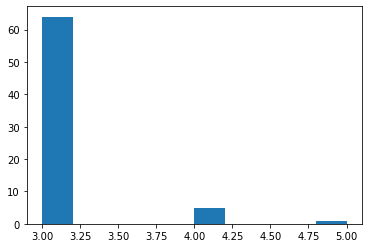

In [204]:
#The disctionary states this represent total number of vitamin D supplements provided during stay.
#Values appear to be plausible. Outliers will be retained.
pp.hist(vitd_supp_outliers['VitD_supp'])

In [205]:
#Initial_days Z-scores.
med['initial_days_z'] = stats.zscore(med['Initial_days'])

In [206]:
initial_days_outliers = med.query('initial_days_z > 3 | initial_days_z < -3')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

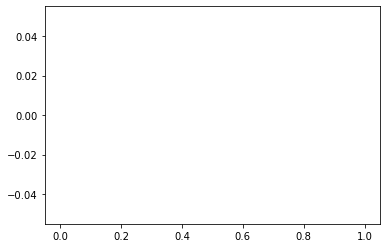

In [207]:
#No outliers detected.
pp.hist(initial_days_outliers['Initial_days'])

In [208]:
#TotalCharge Z-scores
med['total_charge_z'] = stats.zscore(med['TotalCharge'])

In [209]:
total_charge_outliers = med.query('total_charge_z > 3 | total_charge_z < -3')

(array([13.,  8., 14., 28., 52., 66., 46., 39.,  9.,  1.]),
 array([16053.46288 , 16600.539013, 17147.615146, 17694.691279,
        18241.767412, 18788.843545, 19335.919678, 19882.995811,
        20430.071944, 20977.148077, 21524.22421 ]),
 <BarContainer object of 10 artists>)

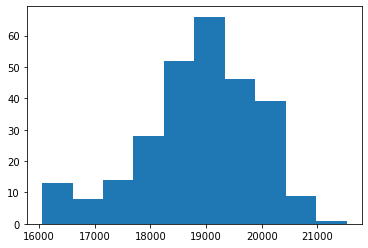

In [210]:
#There are enough values at these levels that they may be accurate for multiple day stays. 
#They will be retained until further investigation in the data analysis cycle.
pp.hist(total_charge_outliers['TotalCharge'])

In [211]:
#Additional_charges Z-scores.
med['add_charge_z'] = stats.zscore(med['Additional_charges'])

In [212]:
#Detect Outliers
add_charge_outliers = med.query('add_charge_z > 3 | add_charge_z < -3')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

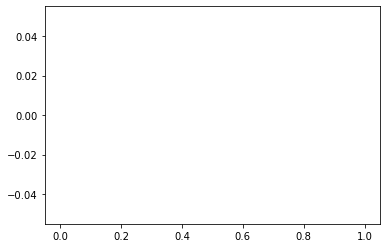

In [213]:
#No outliers detected.
pp.hist(add_charge_outliers['Additional_charges'])

In [215]:
# Export cleaned data
med.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D206\medical_clean_data.csv")

In [216]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   CaseOrder                10000 non-null  int64  
 2   Customer_id              10000 non-null  object 
 3   Interaction              10000 non-null  object 
 4   UID                      10000 non-null  object 
 5   City                     10000 non-null  object 
 6   State                    10000 non-null  object 
 7   County                   10000 non-null  object 
 8   Zip                      10000 non-null  int64  
 9   Lat                      10000 non-null  float64
 10  Lng                      10000 non-null  float64
 11  Population               10000 non-null  int64  
 12  Area                     10000 non-null  int64  
 13  Timezone                 10000 non-null  object 
 14  Job                    

In [217]:
# reduce data set to relevant columns
med_pca = med[['Zip', 'Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'education_numeric', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten','VitD_supp', 'Soft_drink','HighBlood','Stroke','Complication_risk', 'Overweight','Arthritis', 'Diabetes', 'Hyperlipidemia','BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_days','TotalCharge','Additional_charges','S1_Timely_admission','S2_Timely_Treatment','S3_Timely_Visits','S4_Reliability', 'S5_Options','S6_Hours_of_Treatment','S7_Courteous_staff','S8_Dr_Actively_Listened', 'timezone_numeric']]

In [218]:
#Normalize reduced data set
med_normalized = (med_pca - med_pca.mean())/med_pca.std()

In [219]:
#Run PCA
pca = PCA(n_components = med_pca.shape[1])

In [220]:
#Fit PCA to dataset
pca.fit(med_normalized)

PCA(n_components=39)

In [221]:
#View PCA loadings
loadings = pd.DataFrame(pca.components_.T, 
columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4','PCA5','PCA6', 'PCA7', 'PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20','PCA21','PCA22','PCA23','PCA24','PCA25','PCA26','PCA27','PCA28','PCA29','PCA30','PCA31','PCA32','PCA33','PCA34','PCA35','PCA36','PCA37','PCA38','PCA39'],
index=med_normalized.columns)
loadings

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39
Zip,0.029476,0.560759,-0.021798,0.004698,-0.003745,-0.013349,0.072167,0.010282,-0.003834,-0.004694,...,0.015953,0.002993,0.003813,0.010233,-0.014801,-0.018797,-0.780123,0.005174,-0.005761,-0.216765
Lat,-0.007220,0.063098,-0.021251,-0.005421,0.011829,0.079052,-0.674352,-0.134345,0.041022,0.051978,...,-0.073687,-0.024650,0.017533,0.002248,-0.007472,-0.005387,-0.145624,0.005813,-0.000601,-0.021923
Lng,-0.026018,-0.585498,0.024753,-0.001166,0.001920,-0.005909,0.013638,0.005995,0.006401,-0.001809,...,0.003187,0.002662,0.002085,0.002365,-0.004569,-0.000748,-0.204046,0.011818,-0.046290,-0.781724
Population,-0.006952,0.029481,0.023989,-0.007793,0.019774,-0.085344,0.666018,0.105178,-0.034725,-0.061418,...,-0.081840,-0.018672,-0.017394,-0.020674,-0.006573,-0.002240,-0.047506,-0.001013,-0.001486,0.006063
Area,0.003987,0.008601,0.018393,0.008627,-0.004723,0.029103,0.091460,-0.111395,0.207901,0.212034,...,0.045153,-0.023893,0.042497,-0.019373,-0.000186,-0.002861,0.004255,-0.010711,-0.004838,-0.001432
Children,-0.001431,0.010987,0.007504,0.008483,0.021078,-0.031178,0.000224,0.386518,0.356508,0.012241,...,0.001927,0.019646,-0.015683,-0.013676,-0.001590,0.004995,-0.003694,0.002820,-0.002502,0.001296
Age,0.000958,-0.009319,0.037799,0.481014,0.042726,-0.022318,-0.041239,0.129255,-0.090216,0.128597,...,0.006598,0.010863,-0.002294,-0.001512,0.003934,0.010768,-0.000276,0.485247,-0.012387,0.009388
education_numeric,0.003034,-0.003465,0.003480,-0.014305,0.020256,-0.025286,0.053868,-0.041921,0.033363,-0.140824,...,0.017284,-0.005596,0.008167,-0.016276,-0.007229,-0.001260,0.005418,0.000865,-0.004096,0.000090
Income,0.002369,0.005407,-0.006385,0.003010,-0.019547,0.004788,0.076453,0.009917,0.167547,0.260305,...,0.006535,-0.005279,0.005765,-0.003142,-0.002297,-0.001620,-0.002571,-0.001131,-0.001040,0.000003
ReAdmis,0.047448,0.019131,0.522998,-0.050710,0.049674,-0.380217,-0.063246,-0.000071,-0.004609,-0.005207,...,-0.013940,-0.002273,0.014865,0.007308,-0.029629,-0.743474,0.021804,0.026048,0.090255,-0.006274


In [222]:
#Covariance matrix
cov_matrix = np.dot(med_normalized.T, med_normalized)/med_pca.shape[0]

In [223]:
# Eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

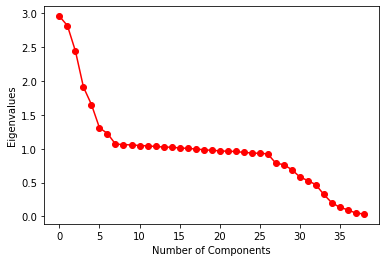

In [224]:
#Plot Eigenvalues
pp.plot(eigenvalues, 'ro-')
pp.xlabel('Number of Components')
pp.ylabel('Eigenvalues')
pp.show()

In [225]:
#Final Export
med.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D206\medical_clean_data_withpca.csv")